# Plots of null geodesics in Kerr spacetime
## Computation with `kerrgeodesic_gw`

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](https://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

It requires [SageMath](http://www.sagemath.org/) (version $\geq$ 8.2), with the package [kerrgeodesic_gw](https://github.com/BlackHolePerturbationToolkit/kerrgeodesic_gw) (version $\geq$ 0.3). To install the latter, simply run 
```
sage -pip install kerrgeodesic_gw
```
in a terminal.

In [1]:
version()

'SageMath version 9.2, Release Date: 2020-10-24'

First, we set up the notebook to use LaTeX-formatted display:

In [2]:
%display latex

and we ask for CPU demanding computations to be performed in parallel on 8 processes:

In [3]:
Parallelism().set(nproc=8)

A Kerr black bole is entirely defined by two parameters $(m, a)$, where $m$ is the black hole mass and $a$ is the black hole angular momentum divided by $m$.
In this notebook, we shall set $m=1$ and we denote the angular momentum parameter $a$ by the symbolic variable `a`, using `a0` for a specific numerical value:

In [4]:
a = var('a')
a0 = 0.95

The spacetime object is created as an instance of the class `KerrBH`:

In [5]:
from kerrgeodesic_gw import KerrBH
M = KerrBH(a)
print(M)

Kerr spacetime M


The Boyer-Lindquist coordinate $r$ of the event horizon:

In [6]:
rH = M.event_horizon_radius()
rH

sqrt(-a^2 + 1) + 1

In [7]:
rH0 = rH.subs({a: a0})
rH0

1.31224989991992

The method `boyer_lindquist_coordinates()` returns the chart of Boyer-Lindquist coordinates `BL` and allows the user to instanciate the Python variables `(t, r, th, ph)` to the coordinates $(t,r,\theta,\phi)$:

In [8]:
BL.<t, r, th, ph> = M.boyer_lindquist_coordinates()
BL

Chart (M, (t, r, th, ph))

The metric tensor is naturally returned by the method `metric()`:

In [9]:
g = M.metric()
g.display()

g = -(a^2*cos(th)^2 + r^2 - 2*r)/(a^2*cos(th)^2 + r^2) dt*dt - 2*a*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dt*dph + (a^2*cos(th)^2 + r^2)/(a^2 + r^2 - 2*r) dr*dr + (a^2*cos(th)^2 + r^2) dth*dth - 2*a*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dph*dt + (2*a^2*r*sin(th)^4 + (a^2*r^2 + r^4 + (a^4 + a^2*r^2)*cos(th)^2)*sin(th)^2)/(a^2*cos(th)^2 + r^2) dph*dph

## Spherical photon orbits

Functions $\ell(r_0)$ and $q(r_0)$ for spherical photon orbits:

In [10]:
r = var('r')
lsph(a, r) = (r^2*(3 - r) - a^2*(r + 1))/(a*(r -1))
lsph

(a, r) |--> -(a^2*(r + 1) + (r - 3)*r^2)/(a*(r - 1))

In [11]:
qsph(a, r) = r^3 / (a^2*(r - 1)^2) * (4*a^2 - r*(r - 3)^2)
qsph

(a, r) |--> -((r - 3)^2*r - 4*a^2)*r^3/(a^2*(r - 1)^2)

### Spherical photon orbit at $r_0 = 3 m$ ($q = q_{\rm max} = 27 m^2$)

In [12]:
r0 = 3.
E = 1
L = lsph(a0, r0)
Q = qsph(a0, r0)
L, Q

(-1.90000000000000, 27.0000000000000)

In [13]:
P = M.point((0, r0, pi/2, 0), name='P')
print(P)

Point P on the Kerr spacetime M


A geodesic is constructed by providing the range $[\lambda_{\rm min},\lambda_{\rm max}]$ of the affine parameter $\lambda$, the initial point and either 
 - (i) the Boyer-Lindquist components $(p^t_0, p^r_0, p^\theta_0, p^\phi_0)$ of the initial 4-momentum vector
   $p_0 = \left. \frac{\mathrm{d}x}{\mathrm{d}\lambda}\right| _{\lambda_{\rm min}}$,
 - (ii) the four integral of motions $(\mu, E, L, Q)$
 - or (iii) some of the components of $p_0$ along with with some integrals of motion. 

In [14]:
lmax = 100 # lambda_max

In [15]:
Li = M.geodesic([0, lmax], P, mu=0, E=E, L=L, Q=Q, a_num=a0,
                name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 3.00000000000000 d/dt + (9.36596633575423e-9) d/dr + 0.577350269189626 d/dth

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [16]:
v0 = Li.initial_tangent_vector()
Li = M.geodesic([0, lmax], P, pt0=v0[0], pr0=0, pth0=v0[2], pph0=v0[3],
                a_num=a0, name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 3.00000000000000 d/dt + 0.577350269189626 d/dth

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


The numerical integration of the geodesic equation is performed via `integrate()`, by providing the integration step $\delta\lambda$ in units of $m$:

In [17]:
Li.integrate(step=0.001, method='dopri5')
Li.check_integrals_of_motion(0.99*lmax)

quantity,value,initial value,diff.,relative diff.
,,,,-
,,,,
,,,,
,,,,


In [18]:
Li.plot(prange=(0, 0.2*lmax), plot_points=2000, thickness=3, color='green',
        display_tangent=True, scale=0.2, width_tangent=2, color_tangent='green', 
        plot_points_tangent=20, horizon_color='lightgrey')

Graphics3d Object

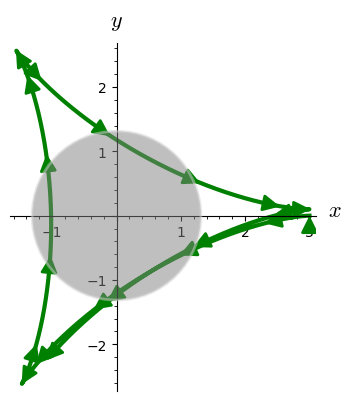

In [19]:
Li.plot(coordinates='xy', prange=(0, 0.2*lmax), plot_points=2000, thickness=3, color='green',
        display_tangent=True, scale=0.2, width_tangent=2, color_tangent='green', 
        plot_points_tangent=20, horizon_color='lightgrey')

### Prograde spherical photon orbit at $r_0 = 1.6m$

In [20]:
r0 = 1.6
L = lsph(a0, r0)
Q = qsph(a0, r0)
L, Q

(2.17105263157895, 5.97569713758080)

In [21]:
P = M.point((0, r0, pi/2, 0), name='P')
lmax = 50
Li = M.geodesic([0, lmax], P, mu=0, E=E, L=L, Q=Q, a_num=a0,
                name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 7.66666666666666 d/dt + (1.74608999691187e-24 + 2.85158136717879e-8*I) d/dr + 0.954892151626195 d/dth + 2.45614035087719 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [22]:
v0 = Li.initial_tangent_vector()
Li = M.geodesic([0, lmax], P, pt0=v0[0], pr0=0, pth0=v0[2], pph0=v0[3],
                a_num=a0, name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 7.66666666666666 d/dt + 0.954892151626195 d/dth + 2.45614035087719 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [23]:
Li.integrate(step=0.0004, method='dopri5')
Li.check_integrals_of_motion(0.99*lmax)

quantity,value,initial value,diff.,relative diff.
,,,,
,,,,
,,,,
,,,,


In [24]:
Li.plot(prange=(0, 0.5*lmax), plot_points=2000, thickness=3, color='green',
        display_tangent=True, scale=0.05, width_tangent=1, color_tangent='green', 
        plot_points_tangent=20, horizon_color='lightgrey')

Graphics3d Object

### Spherical photon orbit at $r_0=2.8m$

In [25]:
r0 = 2.8
L = lsph(a0, r0)
Q = qsph(a0, r0)
L, Q

(-1.08859649122807, 26.2604206422489)

In [26]:
P = M.point((0, r0, pi/2, 0), name='P')
lmax = 100
Li = M.geodesic([0, lmax], P, mu=0, E=E, L=L, Q=Q, a_num=a0,
                name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 3.22222222222222 d/dt + (4.65527024480212e-25 + 7.60263326216718e-9*I) d/dr + 0.653634213345212 d/dth + 0.116959064327486 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [27]:
v0 = Li.initial_tangent_vector()
Li = M.geodesic([0, lmax], P, pt0=v0[0], pr0=0, pth0=v0[2], pph0=v0[3],
                a_num=a0, name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 3.22222222222222 d/dt + 0.653634213345212 d/dth + 0.116959064327486 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [28]:
Li.integrate(step=0.001, method='dopri5')
Li.check_integrals_of_motion(0.99*lmax)

quantity,value,initial value,diff.,relative diff.
,,,,
,,,,
,,,,
,,,,


In [29]:
Li.plot(prange=(0, 0.4*lmax), plot_points=2000, thickness=3, color='green',
        display_tangent=True, scale=0.2, width_tangent=2, color_tangent='green', 
        plot_points_tangent=20, horizon_color='lightgrey')

Graphics3d Object

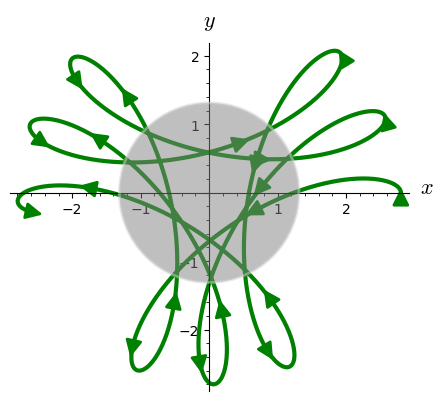

In [30]:
Li.plot(prange=(0, 0.4*lmax), coordinates='xy', plot_points=2000, thickness=3, color='green',
        display_tangent=True, scale=0.2, width_tangent=2, color_tangent='green', 
        plot_points_tangent=20, horizon_color='lightgrey')

### Retrograde spherical photon orbit at $r_0 = 3.9 m$

In [31]:
r0 = 3.9
L = lsph(a0, r0)
Q = qsph(a0, r0)
L, Q

(-6.57395644283122, 3.52474056409564)

In [32]:
P = M.point((0, r0, pi/2, 0), name='P')

In [33]:
lmax = 100
Li = M.geodesic([0, lmax], P, mu=0, E=E, L=L, Q=Q, a_num=a0,
                name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 2.37931034482759 d/dt + (2.22112222707613e-8) d/dr + 0.123433875307859 d/dth - 0.326678765880218 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [34]:
v0 = Li.initial_tangent_vector()
Li = M.geodesic([0, lmax], P, pt0=v0[0], pr0=0, pth0=v0[2], pph0=v0[3],
                a_num=a0, name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 2.37931034482759 d/dt + 0.123433875307859 d/dth - 0.326678765880218 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [35]:
Li.integrate(step=0.0004, method='dopri5')
Li.check_integrals_of_motion(0.99*lmax)

quantity,value,initial value,diff.,relative diff.
,,,,
,,,,
,,,,
,,,,


In [36]:
Li.plot(prange=(0, lmax), plot_points=2000, thickness=3, color='green',
        display_tangent=True, scale=0.2, width_tangent=2, color_tangent='green', 
        plot_points_tangent=20, horizon_color='lightgrey')

Graphics3d Object

### A polar spherical photon orbit

In [37]:
rph_pol(a) = 1 + 2*sqrt(1 - a^2/3)*cos(1/3*arccos((1 - a^2)/(1 - a^2/3)^(3/2)))
rph_pol

a |--> 2*sqrt(-1/3*a^2 + 1)*cos(1/3*arccos(-(a^2 - 1)/(-1/3*a^2 + 1)^(3/2))) + 1

In [38]:
r0 = rph_pol(a0)
L = lsph(a0, r0)
Q = qsph(a0, r0)
r0, L, Q

(2.49269429554008, -6.26333640524599e-16, 22.8640201857508)

In [39]:
lmax = 30
P = M.point((0, r0, pi/2, 0), name='P')
Li = M.geodesic([0, lmax], P, mu=0, E=E, L=0, Q=Q, a_num=a0,
                name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 3.67971815257238 d/dt + (1.31343299672075e-24 + 2.14499886438313e-8*I) d/dr + 0.769552507817167 d/dth + 0.357746396090726 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [40]:
v0 = Li.initial_tangent_vector()
Li = M.geodesic([0, lmax], P, pt0=v0[0], pr0=0, pth0=v0[2], pph0=v0[3],
                a_num=a0, name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 3.67971815257238 d/dt + 0.769552507817167 d/dth + 0.357746396090726 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [50]:
Li.integrate(step=0.002, method='dopri5')
#Li.check_integrals_of_motion(0.99*lmax)

In [51]:
Li.plot(prange=(0, 0.5*lmax), plot_points=2000, thickness=3, color='green',
        display_tangent=True, scale=0.2, width_tangent=2, color_tangent='green', 
        plot_points_tangent=20, horizon_color='lightgrey')

Graphics3d Object

### Stable inner spherical photon orbit at $r_0 = 0.5 m$

In [57]:
r0 = 0.5
L = lsph(a0, r0)
Q = qsph(a0, r0)
L, Q

(1.53421052631579, 0.268698060941828)

In [58]:
lmax = 30
P = M.point((0, r0, pi/2, 0), name='P')
Li = M.geodesic([0, lmax], P, mu=0, E=E, L=L, Q=Q, a_num=a0,
                name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = -7.00000000000000 d/dt + 2.07344374774655 d/dth - 5.26315789473685 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [59]:
v0 = Li.initial_tangent_vector()
Li = M.geodesic([0, lmax], P, pt0=v0[0], pr0=0, pth0=v0[2], pph0=v0[3],
                a_num=a0, name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = -7.00000000000000 d/dt + 2.07344374774655 d/dth - 5.26315789473685 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [60]:
Li.integrate(step=0.0004, method='dopri5')
Li.check_integrals_of_motion(0.99*lmax)

quantity,value,initial value,diff.,relative diff.
,,,,
,,,,
,,,,
,,,,


In [63]:
Li.plot(prange=(0, lmax), plot_points=2000, thickness=3, color='green',
        display_tangent=True, scale=0.01, width_tangent=1, color_tangent='green', 
        plot_points_tangent=20, plot_horizon=False)

Graphics3d Object